In [132]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('metro_zvi.csv')
df = df.drop(columns=['RegionID', 'RegionType','SizeRank','StateName'])
df = df.set_index('RegionName')
df = df.loc[:, '2000-01-31':]

df_plot = df.head(10)
df_plot = df_plot.T
df_plot.index = pd.to_datetime(df_plot.index) 

df.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,124952.583264,125172.414915,125445.038530,126029.762672,126702.710055,127424.200349,128188.399888,129013.278919,129871.299556,130732.588158,...,368342.550149,368944.348980,369448.501052,370184.720224,370828.567353,371298.260498,371016.982722,370477.532421,369777.238792,369146.758903
"New York, NY",224104.107786,225056.423800,226017.559977,227965.193784,229982.036039,232218.002977,234660.852635,237262.621009,239925.243478,242580.970030,...,694463.939098,698112.907260,700981.582357,702828.956760,703938.611027,705266.111170,707009.440660,709510.127516,711326.861714,712842.475773
"Los Angeles, CA",228441.264620,229291.355968,230423.669537,232676.593166,235140.585322,237587.321809,240095.472951,242627.519269,245012.685766,247142.518708,...,979263.294758,984668.937931,989326.464086,993489.580771,994044.173013,991951.863479,986697.459794,982246.652053,977325.621835,972836.618922
"Chicago, IL",159204.293651,159351.670450,159632.352157,160330.618493,161170.548906,162113.178079,163116.480169,164532.175467,166194.535616,168109.513101,...,336401.662700,337417.542386,338496.548214,339792.563198,341188.253115,342585.506509,343463.210750,344086.738417,344388.252982,344762.755307
"Dallas, TX",130776.117982,130834.366121,130901.328321,131075.222120,131304.496332,131536.569175,131779.894376,132144.393518,132601.186679,133120.876084,...,386210.886078,386101.104828,385802.176509,385258.927239,384716.914401,383910.093012,382370.526648,380191.067291,377715.452411,375293.228730


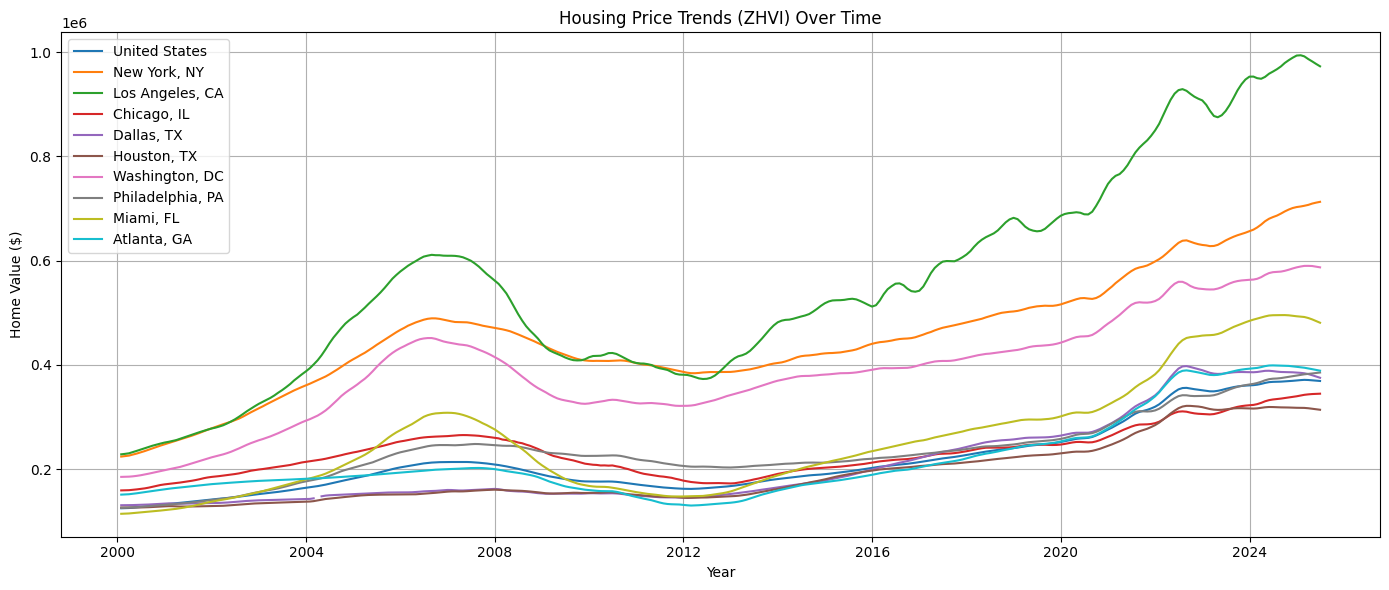

In [17]:


plt.figure(figsize=(14, 6))
for city in df_plot.columns:
    plt.plot(df_plot.index, df_plot[city], label=city)

plt.title("Housing Price Trends (ZHVI) Over Time")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': '12-Month Rolling Average of Home Prices'}>

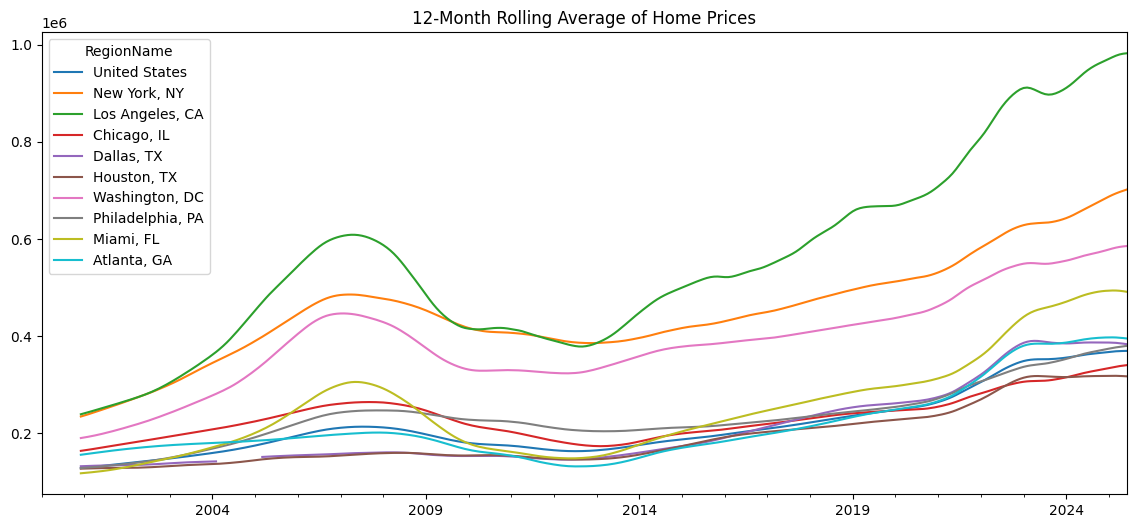

In [38]:
df_roll = df_plot.rolling(window=12).mean()
df_roll.plot(figsize=(14,6), title="12-Month Rolling Average of Home Prices")


In [36]:
# Calculate rolling means for all numeric columns
df_rolling = df.T.rolling(window=12).mean().T
# Rename rolling columns
df_rolling.columns = [col + '_rolling' for col in df.columns]

# Concatenate original + rolling columns
df_combined = pd.concat([df, df_rolling], axis=1)

df_combined.head(12)

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-09-30_rolling,2024-10-31_rolling,2024-11-30_rolling,2024-12-31_rolling,2025-01-31_rolling,2025-02-28_rolling,2025-03-31_rolling,2025-04-30_rolling,2025-05-31_rolling,2025-06-30_rolling
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,124952.583264,125172.414915,125445.038530,126029.762672,126702.710055,127424.200349,128188.399888,129013.278919,129871.299556,130732.588158,...,364244.850817,365023.543555,365788.438882,366577.648468,367383.655056,368161.259535,368784.066906,369203.756896,369442.917619,369581.683461
"New York, NY",224104.107786,225056.423800,226017.559977,227965.193784,229982.036039,232218.002977,234660.852635,237262.621009,239925.243478,242580.970030,...,672024.470010,675933.864219,679882.523331,683746.343056,687453.382093,690922.123929,694069.869748,696898.909494,699477.348069,701916.262658
"Los Angeles, CA",228441.264620,229291.355968,230423.669537,232676.593166,235140.585322,237587.321809,240095.472951,242627.519269,245012.685766,247142.518708,...,957012.621436,960854.380400,964346.117738,967721.259642,971129.388254,974617.538703,977764.034127,980240.710209,981799.145447,982642.521371
"Chicago, IL",159204.293651,159351.670450,159632.352157,160330.618493,161170.548906,162113.178079,163116.480169,164532.175467,166194.535616,168109.513101,...,328565.151053,329938.793697,331323.030142,332760.230141,334256.490202,335749.059995,337105.953150,338266.240346,339268.113796,340195.293052
"Dallas, TX",130776.117982,130834.366121,130901.328321,131075.222120,131304.496332,131536.569175,131779.894376,132144.393518,132601.186679,133120.876084,...,386957.631648,386936.098297,386901.675105,386850.224735,386751.731174,386544.315912,386108.515926,385407.359574,384487.471229,383423.156212
"Houston, TX",126285.073447,126308.596479,126220.423407,126273.128049,126321.746391,126517.293310,126708.096019,127005.363871,127392.076714,127715.428344,...,317751.811322,317859.812130,317963.731419,318088.128901,318207.901287,318282.419399,318217.262816,317985.727684,317627.686303,317195.861344
"Washington, DC",185149.753657,185300.294755,185577.751960,186205.994826,187161.030780,188310.546222,189740.785810,191334.635435,192971.846377,194612.045892,...,570818.011651,572535.928419,574396.008628,576385.634088,578474.629392,580536.606027,582343.184045,583766.835771,584793.577777,585565.541118
"Philadelphia, PA",125748.394230,126027.885836,126218.627731,126689.302974,127144.778627,127694.109847,128265.028630,128880.840872,129554.371828,130252.811334,...,368416.703826,369876.922920,371315.106581,372756.007992,374188.906481,375581.465598,376833.062181,377922.561202,378914.976467,379905.467399
"Miami, FL",114340.669342,114654.558431,114986.950845,115658.455905,116308.279318,116950.376943,117614.497504,118295.707925,119027.359955,119762.802118,...,490101.746669,491462.940626,492497.942168,493235.259194,493719.360016,493977.390739,493889.594162,493415.148904,492528.711510,491326.887883


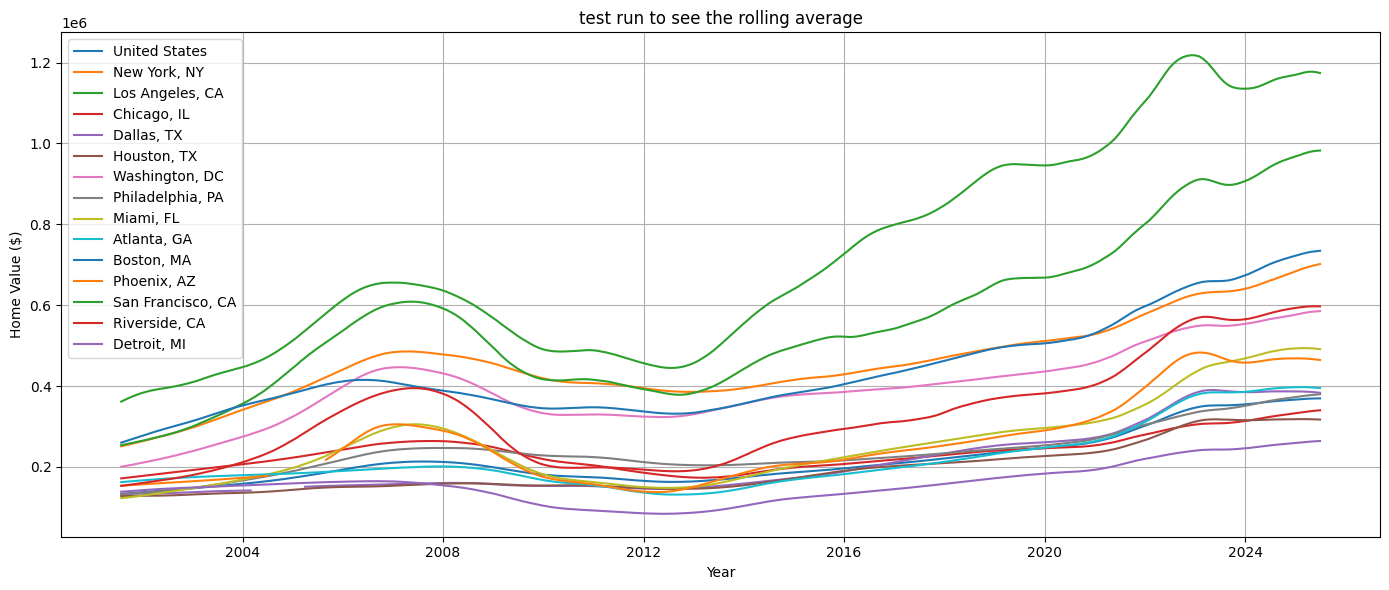

In [55]:
test_run_df = df_combined[df_combined.columns[-12*24:]].head(15)
test_run_df = test_run_df.T
test_run_df.index = pd.to_datetime(test_run_df.index.str[:10])

plt.figure(figsize=(14, 6))
for city in test_run_df.columns:
    plt.plot(test_run_df.index, test_run_df[city], label=city)

plt.title("test run to see the rolling average")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [88]:
test_run_df

RegionName,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA","Boston, MA","Phoenix, AZ","San Francisco, CA","Riverside, CA","Detroit, MI"
2001-07-31,133463.761630,250939.299606,253777.197231,171707.318539,133598.988171,128239.602393,200530.078408,132413.896106,122964.454758,162435.226137,260210.789471,153641.452046,3.616108e+05,153141.439395,138767.067127
2001-08-31,134264.353682,253408.323760,255936.477383,172925.417461,133774.871160,128365.829639,202375.297542,133102.131452,123998.268681,163365.881591,263629.963343,154333.194358,3.666581e+05,154498.069607,139567.965512
2001-09-30,135066.259167,255887.661063,258110.131972,174138.055622,133933.943912,128468.311555,204284.579757,133820.577959,125119.628031,164273.580405,267032.653709,155009.107739,3.713883e+05,155895.273482,140347.202586
2001-10-31,135868.892878,258395.787586,260312.759358,175348.004738,134068.245710,128557.758548,206248.148828,134563.016242,126332.982503,165152.224567,270429.317719,155678.540197,3.757509e+05,157314.784447,141116.608403
2001-11-30,136667.672106,260930.282886,262538.747197,176553.322663,134169.343885,128624.687700,208266.181255,135334.375428,127621.816720,166004.306447,273814.870209,156346.598687,3.796902e+05,158749.894675,141861.776611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,368161.259535,690922.123929,974617.538703,335749.059995,386544.315912,318282.419399,580536.606027,375581.465598,493977.390739,397411.524013,727890.261317,468279.845171,1.175050e+06,595861.859962,261274.889459
2025-03-31,368784.066906,694069.869748,977764.034127,337105.953150,386108.515926,318217.262816,582343.184045,376833.062181,493889.594162,397198.018795,730328.290722,467765.632026,1.177005e+06,596763.285098,262188.979709
2025-04-30,369203.756896,696898.909494,980240.710209,338266.240346,385407.359574,317985.727684,583766.835771,377922.561202,493415.148904,396714.589516,732253.206738,466937.967939,1.177612e+06,597305.660029,262938.579315
2025-05-31,369442.917619,699477.348069,981799.145447,339268.113796,384487.471229,317627.686303,584793.577777,378914.976467,492528.711510,396002.463705,733646.169798,465832.562930,1.176536e+06,597414.498535,263570.615500


/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_28319/1300381239.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct = df.T.pct_change(periods=12) * 100  # % change year-over-year


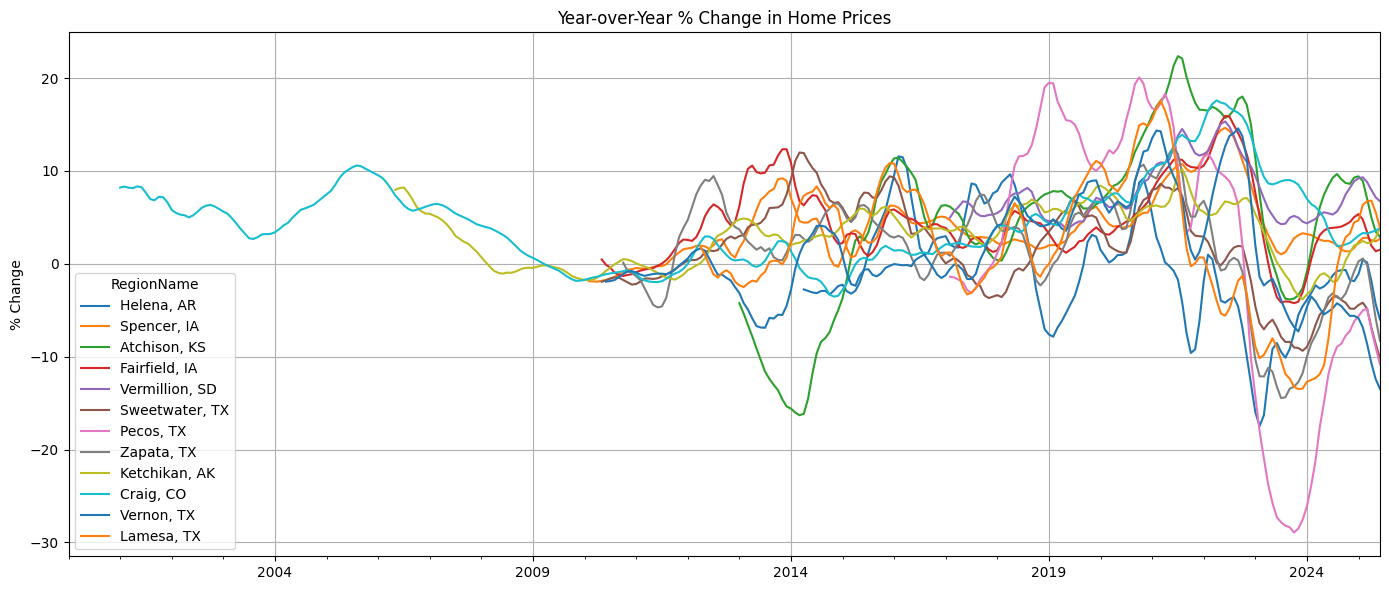

In [56]:
df_pct = df.T.pct_change(periods=12) * 100  # % change year-over-year
df_pct = df_pct.T
df_pct = df_pct.tail(12)  # last year
df_pct = df_pct.T
df_pct.index = pd.to_datetime(df_pct.index.str[:10])

df_pct.plot(figsize=(14, 6), title="Year-over-Year % Change in Home Prices")
plt.ylabel("% Change")
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
df['State'] = df.index.str[-2:]

com_dict = {col: 'mean' for col in df.columns if col != 'State'}
df_state = df.groupby('State', as_index=False).agg(com_dict)
df_state

,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
0,AK,139507.783636,139711.979794,139926.662963,140220.641904,140619.511465,140944.766694,141496.001792,141808.779807,141768.080353,...,386427.721740,387504.802493,388085.347398,388788.860777,389752.215566,391034.899898,391554.806591,392340.023601,393308.504094,394870.579854
1,AL,107473.031662,107642.547568,107789.956145,106926.074137,107271.909998,107651.403567,108058.574239,106429.761709,106787.569874,...,213454.568609,213589.572460,213770.422357,214459.198252,215123.368993,215743.924505,215693.458624,215325.398605,215015.419065,214727.162621
2,AR,81268.272729,81351.079434,81494.473318,81762.437904,82059.048212,82256.659146,82396.731001,82506.660814,82677.751354,...,173616.195558,173539.440932,173339.356829,173607.942938,174064.898476,174460.367695,174203.848530,173434.149025,172862.416229,172559.454349
3,AZ,110758.788640,110868.700111,111066.095969,111491.160408,112031.892210,112576.232903,113100.543192,113610.447738,114172.251846,...,370098.435883,370070.043410,370167.438974,370617.137665,370816.844249,370871.668323,370404.057890,370184.104301,369973.078950,369764.934393
4,CA,210253.783742,210935.227209,211832.294760,213840.961898,216192.830633,218948.706848,222047.943450,225546.454498,229203.699619,...,627864.361955,628215.148545,628794.655650,629775.460082,630139.629617,629681.614785,627791.715736,625798.524260,623299.336352,620592.636698
5,CO,175745.636937,176110.351650,176499.173067,177445.206140,178630.940347,180078.018338,181661.822819,183345.662469,184993.879391,...,610128.639879,612262.889606,613278.284256,613610.033918,613207.175492,612822.132687,611640.654664,610504.700766,609340.220325,608261.807749
6,CT,176651.245527,177357.450813,177966.823370,179166.213311,180222.650875,181449.379856,182754.481740,184227.406132,185696.931899,...,445611.133698,447254.078502,448230.712245,449106.417132,450147.088562,451512.902164,452616.764030,453963.463794,455376.438499,456969.952805
7,DC,185149.753657,185300.294755,185577.751960,186205.994826,187161.030780,188310.546222,189740.785810,191334.635435,192971.846377,...,580483.941347,582629.119598,585011.790701,587143.658580,588769.704420,589930.845477,589991.387621,589704.209209,588480.277998,587158.082435
8,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359470.648606,360897.386988,362964.961676,365132.738382,366581.789040,367383.339385,367447.998892,367477.584045,367518.570934,367824.185887
9,FL,105530.086268,105706.038467,105942.769979,106427.195603,106983.879461,107544.101785,108130.826083,108719.304824,109325.412884,...,370393.463072,369455.139634,368266.585992,367229.010986,366370.850621,365504.498246,364100.413481,362226.080210,360120.795326,357957.209250


In [85]:
df_state.set_index('State', inplace=True)
df_state = df_state.T
df_state.index = pd.to_datetime(df_state.index)
df_state

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,es
2000-01-31,139507.783636,107473.031662,81268.272729,110758.788640,210253.783742,175745.636937,176651.245527,185149.753657,NaN,105530.086268,...,96845.732751,110486.656744,171750.529759,111679.462264,120808.158387,156050.219542,121920.252394,71895.932876,NaN,124952.583264
2000-02-29,139711.979794,107642.547568,81351.079434,110868.700111,210935.227209,176110.351650,177357.450813,185300.294755,NaN,105706.038467,...,96914.504504,110610.582096,171812.411687,112006.123766,121003.291962,156220.686106,121942.874112,71907.530436,NaN,125172.414915
2000-03-31,139926.662963,107789.956145,81494.473318,111066.095969,211832.294760,176499.173067,177966.823370,185577.751960,NaN,105942.769979,...,96988.423325,110717.352324,171954.132902,112329.738295,121253.852144,156421.005673,122086.348508,71943.913901,NaN,125445.038530
2000-04-30,140220.641904,106926.074137,81762.437904,111491.160408,213840.961898,177445.206140,179166.213311,186205.994826,NaN,106427.195603,...,97153.924957,110940.342815,172323.684243,112946.714028,121882.502888,156832.074741,122257.318296,72025.977954,NaN,126029.762672
2000-05-31,140619.511465,107271.909998,82059.048212,112031.892210,216192.830633,178630.940347,180222.650875,187161.030780,NaN,106983.879461,...,97366.463322,111088.961601,178261.079196,113526.168308,122567.835429,152476.922415,122668.241564,72148.026544,NaN,126702.710055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,391034.899898,215743.924505,174460.367695,370871.668323,629681.614785,612822.132687,451512.902164,589930.845477,367383.339385,365504.498246,...,276705.790831,227461.711064,532257.035049,296867.486634,391439.126164,483299.669332,304146.691111,155858.251659,460597.475579,371298.260498
2025-03-31,391554.806591,215693.458624,174203.848530,370404.057890,627791.715736,611640.654664,452616.764030,589991.387621,367447.998892,364100.413481,...,276537.219531,227511.674652,532673.054753,296683.209673,390654.481629,482729.969172,305303.901846,155941.042749,461608.076026,371016.982722
2025-04-30,392340.023601,215325.398605,173434.149025,370184.104301,625798.524260,610504.700766,453963.463794,589704.209209,367477.584045,362226.080210,...,275908.493054,226920.586367,532895.161539,296142.824594,390168.487175,481819.098799,306125.856548,155319.875555,462782.162761,370477.532421
2025-05-31,393308.504094,215015.419065,172862.416229,369973.078950,623299.336352,609340.220325,455376.438499,588480.277998,367518.570934,360120.795326,...,275627.688108,226027.006615,532766.790463,295727.940510,390458.374335,480765.469911,306958.961901,154650.928285,463590.269732,369777.238792


In [119]:
df_state.T

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
State,,,,,,,,,,,,,,,,,,,,,
AK,139507.783636,139711.979794,139926.662963,140220.641904,140619.511465,140944.766694,141496.001792,141808.779807,141768.080353,141384.803758,...,386427.721740,387504.802493,388085.347398,388788.860777,389752.215566,391034.899898,391554.806591,392340.023601,393308.504094,394870.579854
AL,107473.031662,107642.547568,107789.956145,106926.074137,107271.909998,107651.403567,108058.574239,106429.761709,106787.569874,107132.498633,...,213454.568609,213589.572460,213770.422357,214459.198252,215123.368993,215743.924505,215693.458624,215325.398605,215015.419065,214727.162621
AR,81268.272729,81351.079434,81494.473318,81762.437904,82059.048212,82256.659146,82396.731001,82506.660814,82677.751354,82882.698936,...,173616.195558,173539.440932,173339.356829,173607.942938,174064.898476,174460.367695,174203.848530,173434.149025,172862.416229,172559.454349
AZ,110758.788640,110868.700111,111066.095969,111491.160408,112031.892210,112576.232903,113100.543192,113610.447738,114172.251846,114750.147069,...,370098.435883,370070.043410,370167.438974,370617.137665,370816.844249,370871.668323,370404.057890,370184.104301,369973.078950,369764.934393
CA,210253.783742,210935.227209,211832.294760,213840.961898,216192.830633,218948.706848,222047.943450,225546.454498,229203.699619,232743.483882,...,627864.361955,628215.148545,628794.655650,629775.460082,630139.629617,629681.614785,627791.715736,625798.524260,623299.336352,620592.636698
CO,175745.636937,176110.351650,176499.173067,177445.206140,178630.940347,180078.018338,181661.822819,183345.662469,184993.879391,186509.561902,...,610128.639879,612262.889606,613278.284256,613610.033918,613207.175492,612822.132687,611640.654664,610504.700766,609340.220325,608261.807749
CT,176651.245527,177357.450813,177966.823370,179166.213311,180222.650875,181449.379856,182754.481740,184227.406132,185696.931899,187222.538292,...,445611.133698,447254.078502,448230.712245,449106.417132,450147.088562,451512.902164,452616.764030,453963.463794,455376.438499,456969.952805
DC,185149.753657,185300.294755,185577.751960,186205.994826,187161.030780,188310.546222,189740.785810,191334.635435,192971.846377,194612.045892,...,580483.941347,582629.119598,585011.790701,587143.658580,588769.704420,589930.845477,589991.387621,589704.209209,588480.277998,587158.082435
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359470.648606,360897.386988,362964.961676,365132.738382,366581.789040,367383.339385,367447.998892,367477.584045,367518.570934,367824.185887


/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_28319/3026910197.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


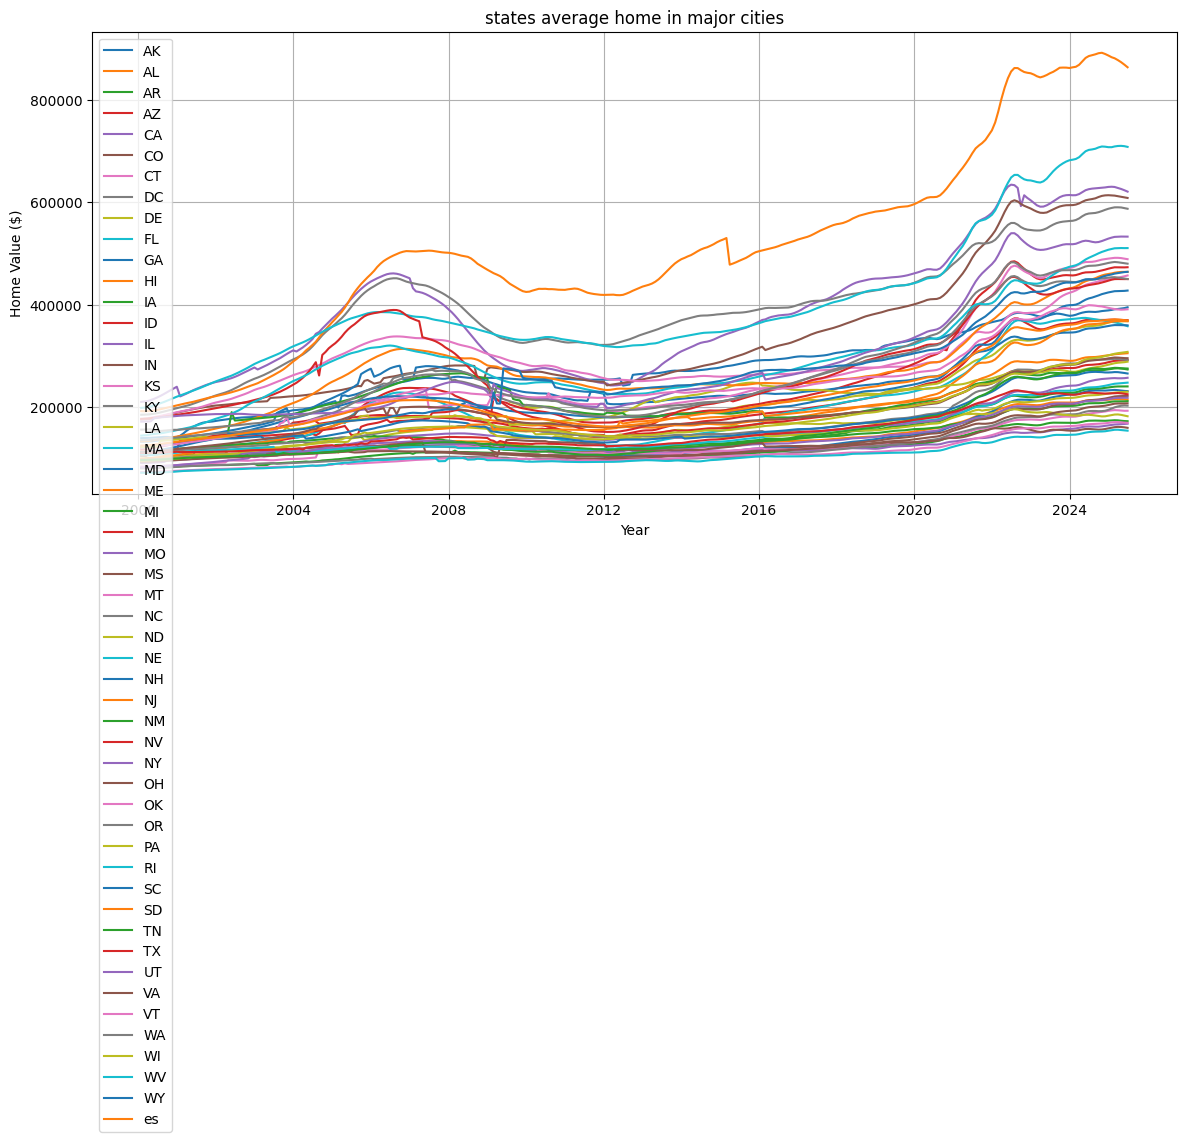

In [ ]:
plt.figure(figsize=(14, 6))
for state in df_state.columns:
    plt.plot(df_state.index, df_state[state], label=state)

plt.title("states average home in major cities")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
affordiblity_df = pd.read_csv('afforidblity.csv')
affordiblity_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
0,102001,0,United States,country,NaN,0.223365,0.222526,0.223598,0.222966,0.221269,...,0.353789,0.360249,0.370468,0.367650,0.374436,0.370674,0.364140,0.364973,0.366095,0.364701
1,394913,1,"New York, NY",msa,NY,0.443019,0.440864,0.442240,0.440785,0.437586,...,0.567654,0.579443,0.596547,0.592586,0.602870,0.597431,0.589042,0.593017,0.597149,0.597048
2,753899,2,"Los Angeles, CA",msa,CA,0.410196,0.406841,0.405929,0.401359,0.395635,...,0.735921,0.753243,0.778724,0.774091,0.788508,0.777542,0.759462,0.759163,0.759480,0.754412
3,394463,3,"Chicago, IL",msa,IL,0.244184,0.241534,0.241076,0.238969,0.235974,...,0.286223,0.291821,0.300605,0.298831,0.305019,0.302753,0.298337,0.299934,0.301635,0.301272
4,394514,4,"Dallas, TX",msa,TX,0.204037,0.203373,0.204642,0.204650,0.203622,...,0.354746,0.360085,0.368814,0.365040,0.370218,0.365589,0.358475,0.357754,0.357158,0.354260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,394787,518,"Lewiston, ID",msa,ID,0.248598,0.247187,0.248210,0.247415,0.245378,...,0.367762,0.374899,0.386518,0.384618,0.393019,0.389882,0.383274,0.385209,0.387833,0.387703
386,394570,523,"Enid, OK",msa,OK,0.138715,0.137916,0.138457,0.137624,0.136141,...,0.186875,0.190038,0.195055,0.194334,0.197837,0.196340,0.193828,0.194341,0.195158,0.194911
387,395199,525,"Walla Walla, WA",msa,WA,0.260056,0.258891,0.259885,0.258819,0.255994,...,0.401942,0.410202,0.422789,0.420507,0.429059,0.425257,0.417989,0.420369,0.423607,0.423558
388,394444,551,"Carson City, NV",msa,NV,0.194804,0.194438,0.195867,0.195995,0.195073,...,0.441031,0.450036,0.465062,0.462333,0.473040,0.468808,0.460972,0.463069,0.465758,0.464989


In [108]:
'''affordiblity_df = affordiblity_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'RegionName'])
affordiblity_df.set_index('StateName', inplace=True)
affordiblity_df.index = affordiblity_df.index.fillna('OVR')

affordiblity_df = affordiblity_df.T
affordiblity_df.index = pd.to_datetime(affordiblity_df.index)'''


affordiblity_df = affordiblity_df.T
affordiblity_df

,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
StateName,,,,,,,,,,,,,,,,,,,,,
OVR,0.223365,0.222526,0.223598,0.222966,0.221269,0.219598,0.217978,0.219159,0.216911,0.214438,...,0.353789,0.360249,0.370468,0.367650,0.374436,0.370674,0.364140,0.364973,0.366095,0.364701
NY,0.443019,0.440864,0.442240,0.440785,0.437586,0.433744,0.429739,0.430437,0.424857,0.418611,...,0.567654,0.579443,0.596547,0.592586,0.602870,0.597431,0.589042,0.593017,0.597149,0.597048
CA,0.410196,0.406841,0.405929,0.401359,0.395635,0.391105,0.388071,0.393032,0.391883,0.390993,...,0.735921,0.753243,0.778724,0.774091,0.788508,0.777542,0.759462,0.759163,0.759480,0.754412
IL,0.244184,0.241534,0.241076,0.238969,0.235974,0.233494,0.231389,0.231878,0.229309,0.226277,...,0.286223,0.291821,0.300605,0.298831,0.305019,0.302753,0.298337,0.299934,0.301635,0.301272
TX,0.204037,0.203373,0.204642,0.204650,0.203622,0.202612,0.201712,0.203004,0.201535,0.199934,...,0.354746,0.360085,0.368814,0.365040,0.370218,0.365589,0.358475,0.357754,0.357158,0.354260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID,0.248598,0.247187,0.248210,0.247415,0.245378,0.243948,0.242438,0.244139,0.241591,0.238304,...,0.367762,0.374899,0.386518,0.384618,0.393019,0.389882,0.383274,0.385209,0.387833,0.387703
OK,0.138715,0.137916,0.138457,0.137624,0.136141,0.134613,0.133560,0.134099,0.132784,0.131143,...,0.186875,0.190038,0.195055,0.194334,0.197837,0.196340,0.193828,0.194341,0.195158,0.194911
WA,0.260056,0.258891,0.259885,0.258819,0.255994,0.252756,0.249307,0.249830,0.247077,0.244158,...,0.401942,0.410202,0.422789,0.420507,0.429059,0.425257,0.417989,0.420369,0.423607,0.423558


In [113]:
aff_dict = {col: 'mean' for col in affordiblity_df.columns if col != 'StateName'}
affordiblity_df = affordiblity_df.groupby('StateName').agg(aff_dict)

/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_28319/1597539445.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


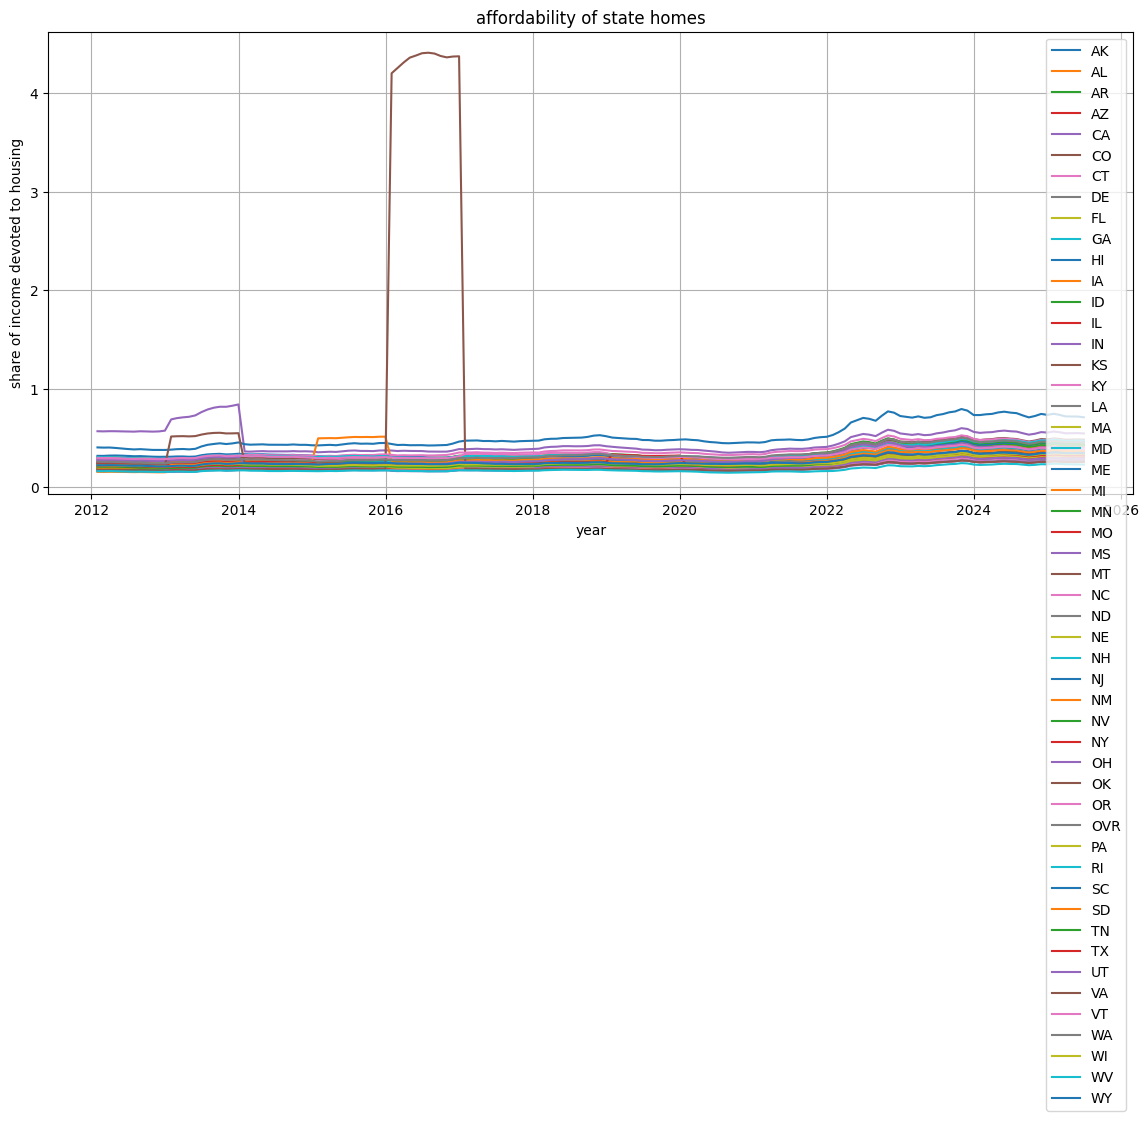

In [116]:


plt.figure(figsize=(14,6))
for state in affordiblity_df.columns:
    plt.plot(affordiblity_df.index, affordiblity_df[state], label=state)

plt.title('affordability of state homes')
plt.xlabel('year')
plt.ylabel('share of income devoted to housing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


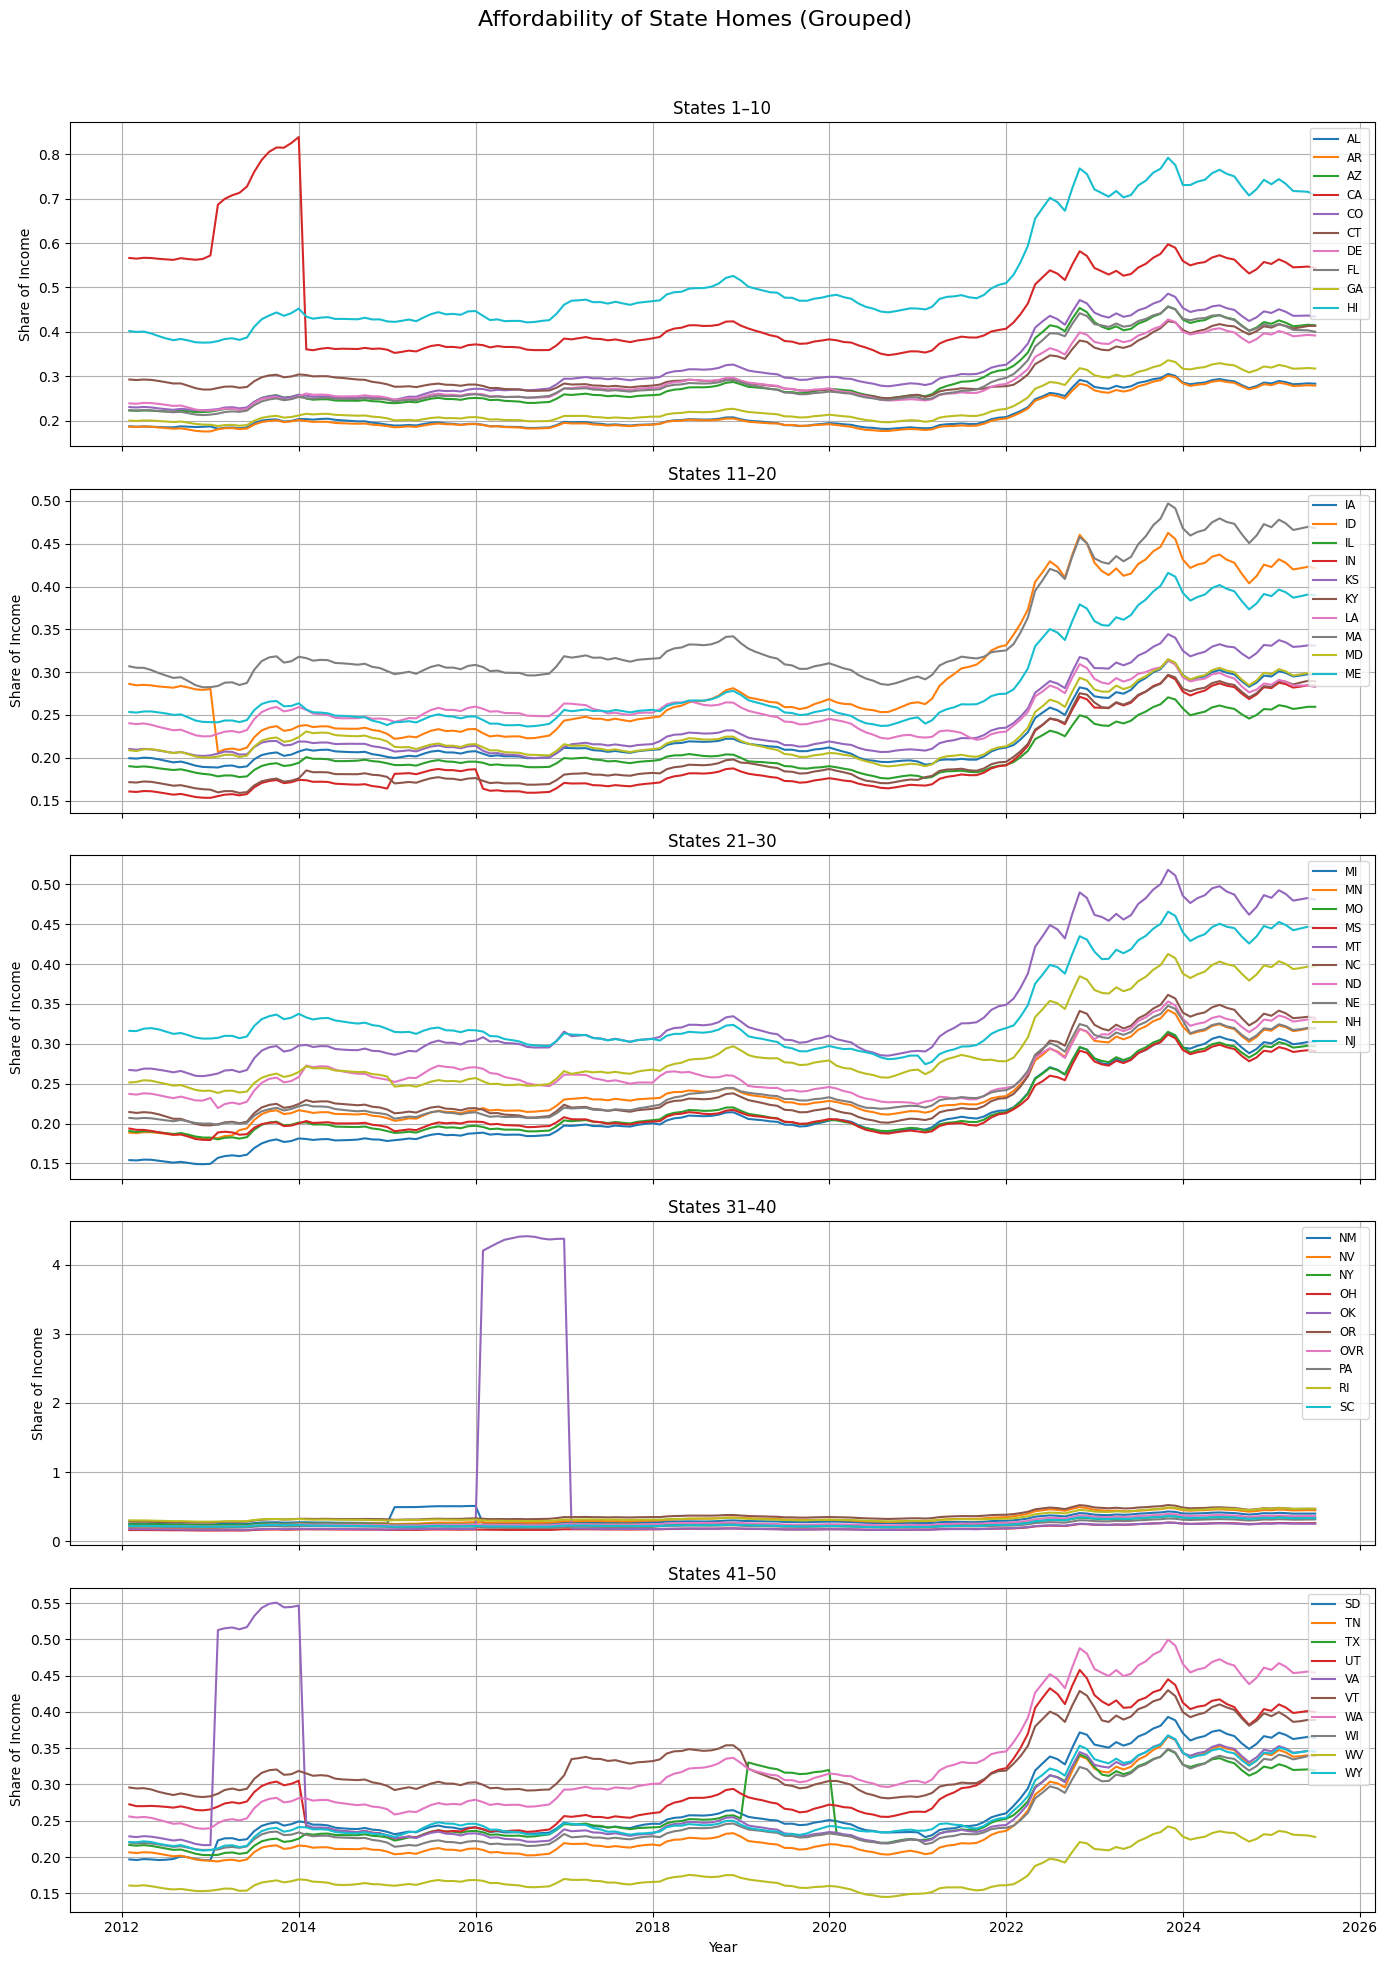

In [ ]:

# Split states into groups of 10
all_states = list(affordiblity_df.columns[1:])
num_groups = 5
states_per_group = 10
state_groups = [all_states[i:i + states_per_group] for i in range(0, len(all_states), states_per_group)]

# Create 5 subplots
fig, axs = plt.subplots(num_groups, 1, figsize=(14, num_groups * 4), sharex=True)

for i, states in enumerate(state_groups):
    ax = axs[i]
    for state in states:
        ax.plot(affordiblity_df.index, affordiblity_df[state], label=state)
    ax.set_title(f'States {i*states_per_group+1}–{i*states_per_group+len(states)}')
    ax.set_ylabel('Share of Income')
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

# Set overall X label
axs[-1].set_xlabel('Year')
fig.suptitle('Affordability of State Homes (Grouped)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [129]:

#affordiblity_df = affordiblity_df.T
final_comp = affordiblity_df.merge(df_state[['es']], left_index=True, right_index=True, how='left')
final_comp



,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,es
2012-01-31,0.236789,0.187670,0.186765,0.223153,0.566411,0.230940,0.292931,0.239247,0.223944,0.200435,...,0.206443,0.216587,0.272604,0.228480,0.295836,0.255863,0.220041,0.160678,0.220651,162100.870459
2012-02-29,0.236226,0.186694,0.186106,0.222405,0.564908,0.230008,0.291700,0.238330,0.223237,0.199588,...,0.205453,0.215638,0.270066,0.227464,0.294482,0.254438,0.218730,0.160239,0.220240,162081.905424
2012-03-31,0.237547,0.187301,0.187138,0.223266,0.566743,0.231136,0.292908,0.240311,0.224117,0.200796,...,0.206622,0.216415,0.270118,0.228704,0.294876,0.255252,0.219437,0.161062,0.221635,162297.324292
2012-04-30,0.237014,0.186585,0.186553,0.222794,0.566316,0.230164,0.292066,0.239882,0.223584,0.200622,...,0.206197,0.215417,0.270429,0.228069,0.293147,0.254015,0.218648,0.159796,0.220669,162664.986861
2012-05-31,0.235443,0.185599,0.185020,0.221719,0.564545,0.227978,0.289685,0.238138,0.222104,0.199594,...,0.204628,0.213547,0.269916,0.226476,0.289871,0.251325,0.217187,0.158083,0.218336,163115.236598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,0.317949,0.287044,0.283144,0.420903,0.556643,0.445430,0.413593,0.397649,0.412761,0.322688,...,0.344295,0.325058,0.406128,0.349687,0.394144,0.462374,0.338961,0.234653,0.348350,371298.260498
2025-03-31,0.312726,0.282223,0.278411,0.412768,0.545386,0.436192,0.407885,0.390224,0.404593,0.317236,...,0.338247,0.319952,0.398485,0.343758,0.386267,0.453602,0.334564,0.230744,0.343005,371016.982722
2025-04-30,0.313437,0.283078,0.279016,0.414192,0.546030,0.436365,0.410323,0.391609,0.403967,0.317798,...,0.339044,0.320369,0.399776,0.344843,0.387187,0.454364,0.336669,0.230239,0.344470,370477.532421
2025-05-31,0.314273,0.284328,0.280030,0.416151,0.547075,0.436942,0.413319,0.393271,0.403595,0.318747,...,0.340367,0.320753,0.401280,0.346303,0.389043,0.455686,0.339101,0.229705,0.346152,369777.238792


In [130]:
final_comp = final_comp[['OVR','es']]
final_comp

,OVR,es
2012-01-31,0.223365,162100.870459
2012-02-29,0.222526,162081.905424
2012-03-31,0.223598,162297.324292
2012-04-30,0.222966,162664.986861
2012-05-31,0.221269,163115.236598
...,...,...
2025-02-28,0.370674,371298.260498
2025-03-31,0.364140,371016.982722
2025-04-30,0.364973,370477.532421
2025-05-31,0.366095,369777.238792


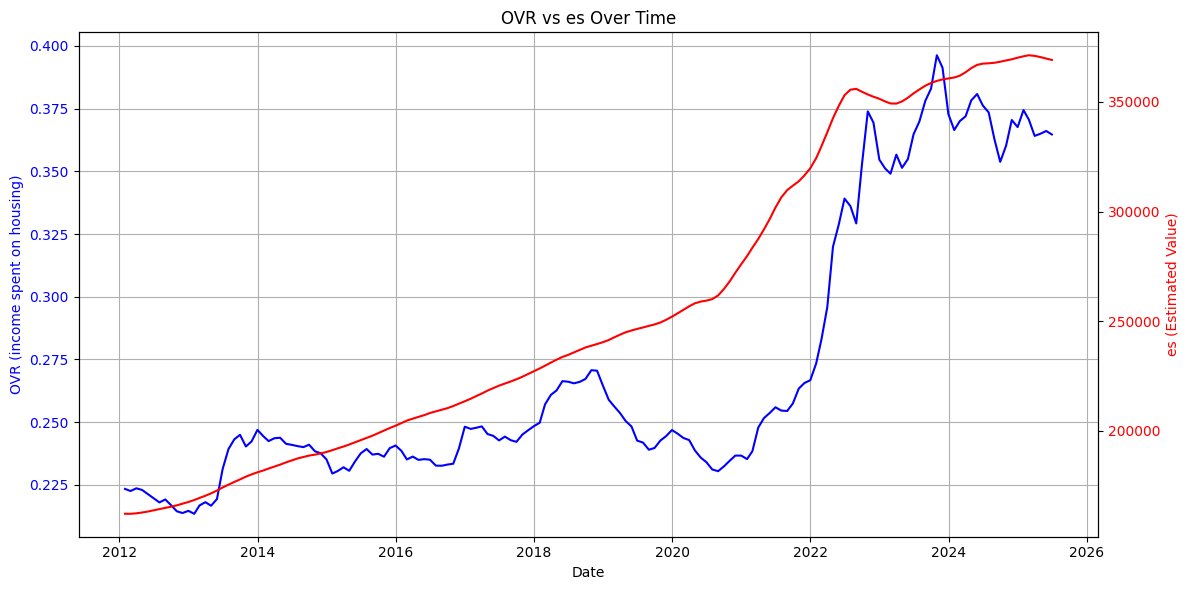

In [131]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.plot(final_comp.index, final_comp['OVR'], color='blue', label='OVR')
ax1.set_ylabel('OVR (income spent on housing)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(final_comp.index, final_comp['es'], color='red', label='es')
ax2.set_ylabel('es (Estimated Value)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('OVR vs es Over Time')
ax1.set_xlabel('Date')
ax1.grid(True)
fig.tight_layout()
plt.show()

the graph basically shows that as house prices have increased so has the income spent on housing almost proportionally. This indicates that wages have stayed roughly the same and the increase in house prices are being afforded by devoting a larger number of ones income to buying the house. In simpler terms housing is outpacing inflation.